In [15]:
import matplotlib.pyplot as plt
import wandb
# Import seaborn
import seaborn as sns
import pandas as pd
# Apply the default theme
sns.set_theme()

In [3]:
project="diffusion_novel_reward",
entity="pgm-diffusion"

In [7]:
api = wandb.Api()
# runs = api.runs(f'{entity}/{project}')
runs = api.runs('pgm-diffusion/diffusion_novel_reward')

In [5]:
runs

<Runs pgm-diffusion/('diffusion_novel_reward',)>

In [10]:
filtered_runs = []
for run in runs:
    if run.config.get("env_name") == 'walker2d-medium-v2':
        filtered_runs.append(run)

In [12]:
filtered_runs

[<Run pgm-diffusion/diffusion_novel_reward/6k9m407y (finished)>,
 <Run pgm-diffusion/diffusion_novel_reward/zua6h87w (finished)>,
 <Run pgm-diffusion/diffusion_novel_reward/fzzqxj8e (finished)>,
 <Run pgm-diffusion/diffusion_novel_reward/0abwqhij (finished)>,
 <Run pgm-diffusion/diffusion_novel_reward/8mxsnz8j (finished)>,
 <Run pgm-diffusion/diffusion_novel_reward/i65nt1ks (finished)>,
 <Run pgm-diffusion/diffusion_novel_reward/o6kwpnno (finished)>,
 <Run pgm-diffusion/diffusion_novel_reward/s9trblfu (finished)>,
 <Run pgm-diffusion/diffusion_novel_reward/txrrtyl5 (finished)>,
 <Run pgm-diffusion/diffusion_novel_reward/e3mh1srk (finished)>,
 <Run pgm-diffusion/diffusion_novel_reward/18zschn7 (finished)>,
 <Run pgm-diffusion/diffusion_novel_reward/2tgvosz5 (finished)>,
 <Run pgm-diffusion/diffusion_novel_reward/65rfwxs1 (finished)>,
 <Run pgm-diffusion/diffusion_novel_reward/v87lzd1g (finished)>,
 <Run pgm-diffusion/diffusion_novel_reward/ha7ozva5 (finished)>,
 <Run pgm-diffusion/diffu

In [19]:
histories = [] 
for run in filtered_runs:
    sigma2 = run.config.get("sigma2")
    target_height = run.config.get("target_height")
    hist = run.history(keys=['reward', 'novel_reward', 'height', 'score'])
    hist['target_height'] = target_height
    hist['sigma2'] = sigma2
    hist['name'] = f'{target_height} {sigma2}'
    histories.append(hist)

In [30]:
df = pd.concat(histories, ignore_index=True)

In [50]:
df.target_height.unique()

array([1, 1.1, 2, 1.6, None, 1.4, 1.2, 0.9], dtype=object)

In [96]:
df.sigma2.unique()

array([0.005 , 0.0005, 0.022 , 0.05  ])

In [45]:
sns.set_style('whitegrid')
sns.set_style("whitegrid", {
    'axes.edgecolor': 'black',
    'axes.linewidth': 1.5
})


In [81]:
palette  = sns.color_palette()
palette

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

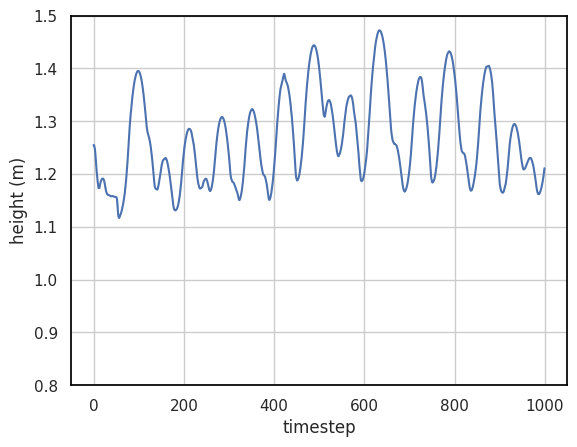

Text(0.5, 0, 'timestep')

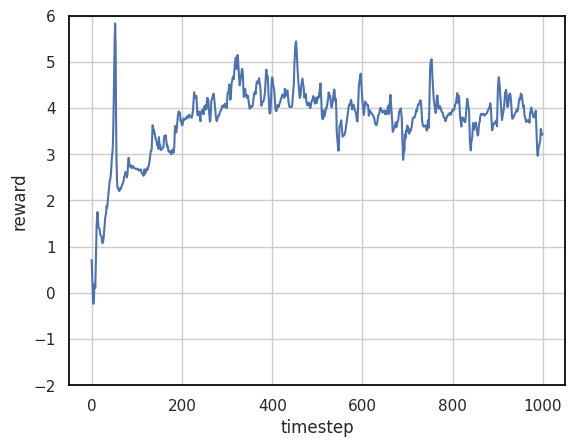

In [82]:
fil_df = df[df['target_height'].isnull()]
sns.lineplot(data=fil_df, x='_step', y='height', c = palette[0])
plt.ylim(0.8, 1.5)
plt.ylabel('height (m)')
plt.xlabel('timestep')
plt.show()

plt.figure() 
sns.lineplot(data=fil_df, x='_step', y='reward',c = palette[0])
plt.ylim(-2, 6)
plt.ylabel('reward')
plt.xlabel('timestep')

Text(0.5, 0, 'timestep')

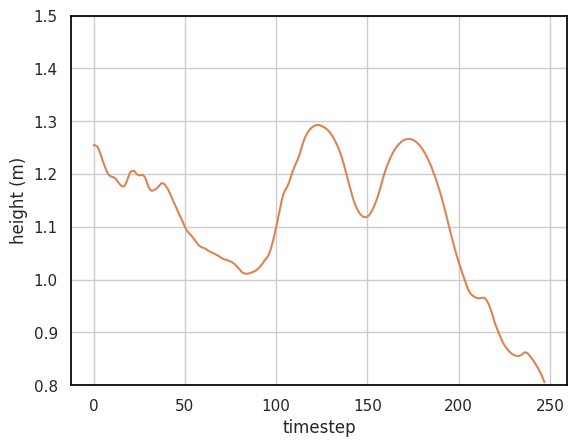

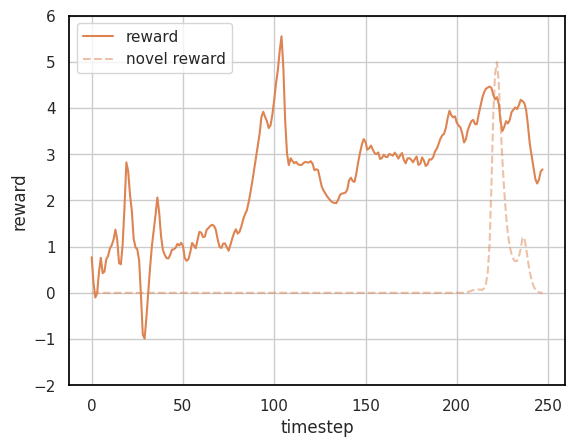

In [91]:
fil_df = df.query('target_height == 0.9 and sigma2 == 0.0005')
sns.lineplot(data=fil_df, x='_step', y='height', c = palette[1])
plt.ylim(0.8, 1.5)
plt.ylabel('height (m)')
plt.xlabel('timestep')

plt.figure() 
sns.lineplot(data=fil_df, x='_step', y='reward',c = palette[1], label='reward')
sns.lineplot(data=fil_df, x='_step', y='novel_reward',
             c = palette[1], label='novel reward', alpha=0.5, linestyle='--')
plt.legend()
plt.ylim(-2, 6)
plt.ylabel('reward')
plt.xlabel('timestep')

Text(0.5, 0, 'timestep')

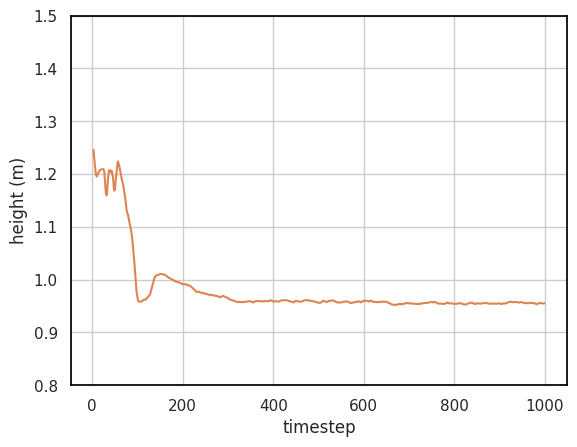

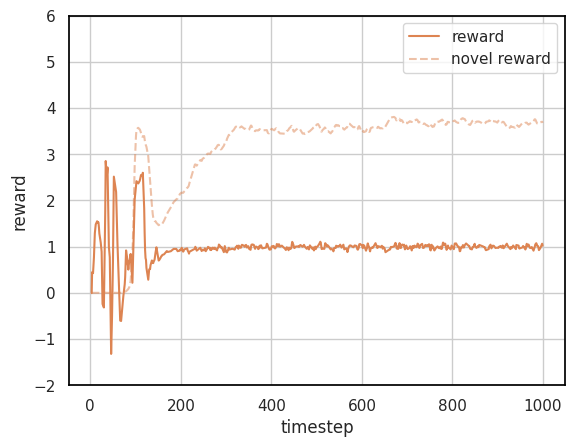

In [92]:
fil_df = df.query('target_height == 0.9 and sigma2 == 0.005')
sns.lineplot(data=fil_df, x='_step', y='height', c = palette[1])
plt.ylim(0.8, 1.5)
plt.ylabel('height (m)')
plt.xlabel('timestep')

plt.figure() 
sns.lineplot(data=fil_df, x='_step', y='reward',c = palette[1], label='reward')
sns.lineplot(data=fil_df, x='_step', y='novel_reward',
             c = palette[1], label='novel reward', alpha=0.5, linestyle='--')
plt.legend()
plt.ylim(-2, 6)
plt.ylabel('reward')
plt.xlabel('timestep')

Text(0.5, 0, 'timestep')

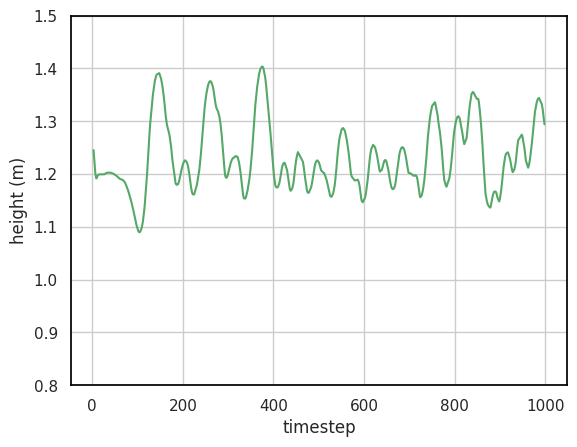

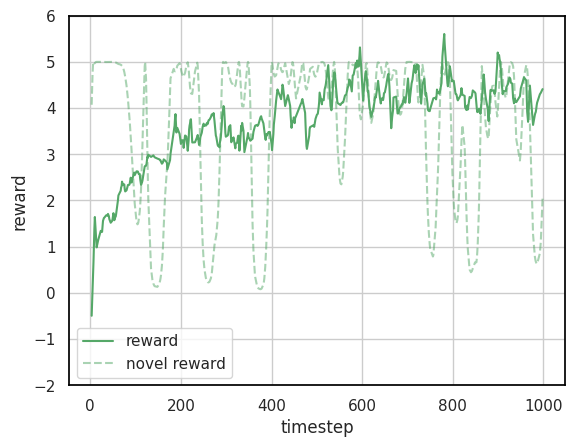

In [104]:
fil_df = df.query('target_height == 1.2 and sigma2 == 0.005')
sns.lineplot(data=fil_df, x='_step', y='height', c = palette[2])
plt.ylim(0.8, 1.5)
plt.ylabel('height (m)')
plt.xlabel('timestep')

plt.figure() 
sns.lineplot(data=fil_df, x='_step', y='reward',c = palette[2], label='reward')
sns.lineplot(data=fil_df, x='_step', y='novel_reward',
             c = palette[2], label='novel reward', alpha=0.5, linestyle='--')
plt.legend()
plt.ylim(-2, 6)
plt.ylabel('reward')
plt.xlabel('timestep')

Text(0.5, 0, 'timestep')

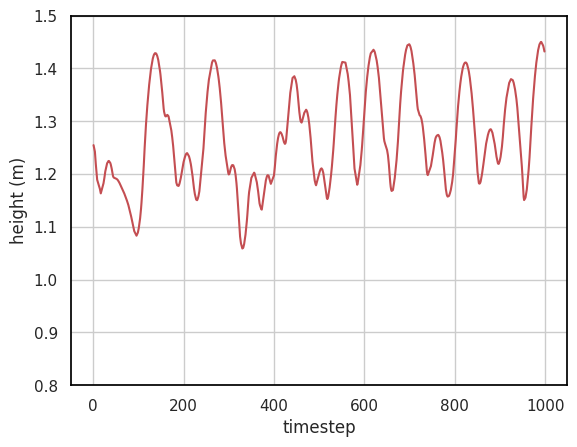

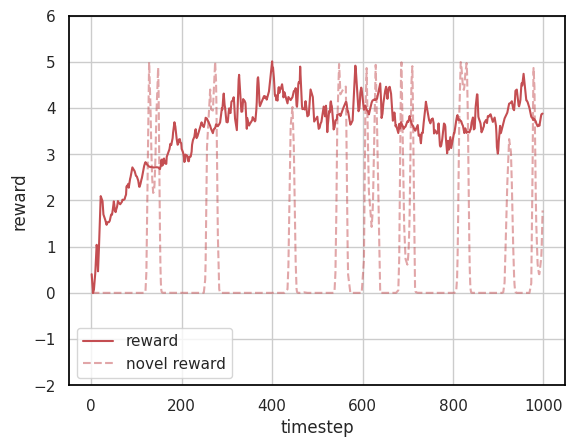

In [109]:
fil_df = df.query('target_height == 1.4 and sigma2 == 0.0005')
sns.lineplot(data=fil_df, x='_step', y='height', c = palette[3])
plt.ylim(0.8, 1.5)
plt.ylabel('height (m)')
plt.xlabel('timestep')

plt.figure() 
sns.lineplot(data=fil_df, x='_step', y='reward',c = palette[3], label='reward')
sns.lineplot(data=fil_df, x='_step', y='novel_reward',
             c = palette[3], label='novel reward', alpha=0.5, linestyle='--')
plt.legend()
plt.ylim(-2, 6)
plt.ylabel('reward')
plt.xlabel('timestep')

Text(0.5, 0, 'timestep')

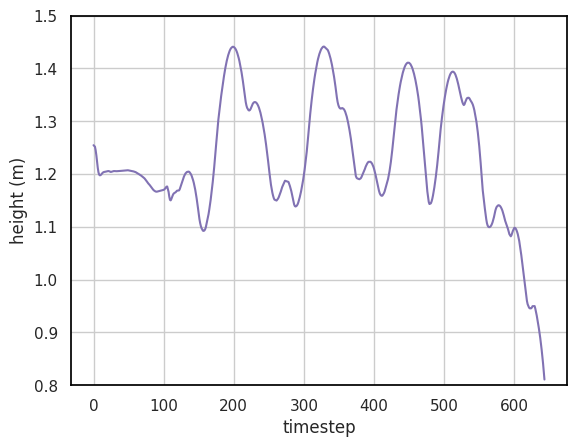

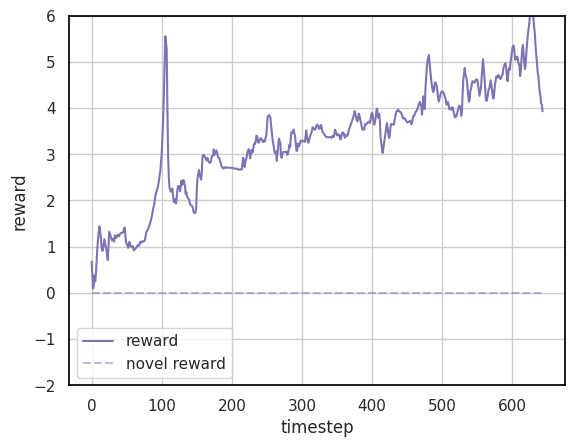

In [117]:
fil_df = df.query('target_height == 2.0 and sigma2 == 0.0005')
sns.lineplot(data=fil_df, x='_step', y='height', c = palette[4])
plt.ylim(0.8, 1.5)
plt.ylabel('height (m)')
plt.xlabel('timestep')

plt.figure() 
sns.lineplot(data=fil_df, x='_step', y='reward',c = palette[4], label='reward')
sns.lineplot(data=fil_df, x='_step', y='novel_reward',
             c = palette[4], label='novel reward', alpha=0.5, linestyle='--')
plt.legend()
plt.ylim(-2, 6)
plt.ylabel('reward')
plt.xlabel('timestep')